# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
data = pd.read_excel('Data.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Feature Engineering

In [6]:
data.drop(labels=['Route','Additional_Info'], axis=1, inplace=True)

In [7]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [8]:
##Handling Date_of_Journey
data['Journey_Day'] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
data['Journey_Month'] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [9]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [10]:
data.drop(labels=['Date_of_Journey'], axis=1, inplace=True)

In [11]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [12]:
##Handling Duration
duration = np.array(data.Duration)
print(duration)

['2h 50m' '7h 25m' '19h' ... '3h' '2h 40m' '8h 20m']


In [13]:
for i in range(0,len(duration)):
    if(len(duration[i].split(' '))== 1):
        if("h" in duration[i]):
            duration[i] = duration[i] + ' ' +"0m" 
        elif("m" in duration[i]):
            duration[i] = "0h" + ' ' + duration[i]

print(duration)

['2h 50m' '7h 25m' '19h 0m' ... '3h 0m' '2h 40m' '8h 20m']


In [14]:
duration_hrs = np.zeros(len(duration))
duration_mins = np.zeros(len(duration))

for i in range(0,len(duration)):
    duration_hrs[i] = duration[i].split(' ')[0].split('h')[0]
    duration_mins[i] = duration[i].split(' ')[1].split('m')[0]

print(duration_hrs)
print(duration_mins)

[ 2.  7. 19. ...  3.  2.  8.]
[50. 25.  0. ...  0. 40. 20.]


In [15]:
data['Duration_Hrs'] = duration_hrs
data['Duration_Mins'] = duration_mins
data.drop(labels=['Duration'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Month,Duration_Hrs,Duration_Mins
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,3897,24,3,2.0,50.0
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,7662,1,5,7.0,25.0
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,9,6,19.0,0.0
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,6218,12,5,5.0,25.0
4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,13302,1,3,4.0,45.0


In [16]:
##Handling Arrival_Time
arrival_time = np.array(data.Arrival_Time)
arrival_hrs = np.zeros(len(arrival_time))
arrival_mins = np.zeros(len(arrival_time))

for i in range(0,len(arrival_time)):
    arrival_time[i] = arrival_time[i].split(' ')[0]
    arrival_hrs[i] = arrival_time[i].split(':')[0]
    arrival_mins[i] = arrival_time[i].split(':')[1]

print(arrival_time)
print(arrival_hrs)
print(arrival_mins)

['01:10' '13:15' '04:25' ... '11:20' '14:10' '19:15']
[ 1. 13.  4. ... 11. 14. 19.]
[10. 15. 25. ... 20. 10. 15.]


In [17]:
data['Arrival_Hrs'] = arrival_hrs
data['Arrival_Mins'] = arrival_mins
data.drop(labels=['Arrival_Time'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,Journey_Day,Journey_Month,Duration_Hrs,Duration_Mins,Arrival_Hrs,Arrival_Mins
0,IndiGo,Banglore,New Delhi,22:20,non-stop,3897,24,3,2.0,50.0,1.0,10.0
1,Air India,Kolkata,Banglore,05:50,2 stops,7662,1,5,7.0,25.0,13.0,15.0
2,Jet Airways,Delhi,Cochin,09:25,2 stops,13882,9,6,19.0,0.0,4.0,25.0
3,IndiGo,Kolkata,Banglore,18:05,1 stop,6218,12,5,5.0,25.0,23.0,30.0
4,IndiGo,Banglore,New Delhi,16:50,1 stop,13302,1,3,4.0,45.0,21.0,35.0


In [18]:
##Handling Departure Time
##Handling Arrival_Time
departure_time = np.array(data.Dep_Time)
departure_hrs = np.zeros(len(departure_time))
departure_mins = np.zeros(len(departure_time))

for i in range(0,len(departure_time)):
    departure_time[i] = departure_time[i].split(' ')[0]
    departure_hrs[i] = departure_time[i].split(':')[0]
    departure_mins[i] = departure_time[i].split(':')[1]

print(departure_time)
print(departure_hrs)
print(departure_mins)

['22:20' '05:50' '09:25' ... '08:20' '11:30' '10:55']
[22.  5.  9. ...  8. 11. 10.]
[20. 50. 25. ... 20. 30. 55.]


In [19]:
data['Dep_Hrs'] = departure_hrs
data['Dep_Mins'] = departure_mins
data.drop(labels=['Dep_Time'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Duration_Hrs,Duration_Mins,Arrival_Hrs,Arrival_Mins,Dep_Hrs,Dep_Mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2.0,50.0,1.0,10.0,22.0,20.0
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,7.0,25.0,13.0,15.0,5.0,50.0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,19.0,0.0,4.0,25.0,9.0,25.0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,5.0,25.0,23.0,30.0,18.0,5.0
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,4.0,45.0,21.0,35.0,16.0,50.0


In [20]:
##Handling Total_Stops
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
data.dropna(axis=0, inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Duration_Hrs,Duration_Mins,Arrival_Hrs,Arrival_Mins,Dep_Hrs,Dep_Mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2.0,50.0,1.0,10.0,22.0,20.0
1,Air India,Kolkata,Banglore,2.0,7662,1,5,7.0,25.0,13.0,15.0,5.0,50.0
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,19.0,0.0,4.0,25.0,9.0,25.0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,5.0,25.0,23.0,30.0,18.0,5.0
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,4.0,45.0,21.0,35.0,16.0,50.0


In [21]:
##OneHotEncoding for 'Airline' 
data = pd.get_dummies(data, columns = ['Airline'], drop_first=True)
data.head()


,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Duration_Hrs,Duration_Mins,Arrival_Hrs,Arrival_Mins,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,0.0,3897,24,3,2.0,50.0,1.0,10.0,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,2.0,7662,1,5,7.0,25.0,13.0,15.0,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,2.0,13882,9,6,19.0,0.0,4.0,25.0,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,1.0,6218,12,5,5.0,25.0,23.0,30.0,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,1.0,13302,1,3,4.0,45.0,21.0,35.0,...,0,1,0,0,0,0,0,0,0,0


In [22]:
##OneHotEncoding for 'Source'
data = pd.get_dummies(data, columns = ['Source'], drop_first=True)
data.head()

,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Duration_Hrs,Duration_Mins,Arrival_Hrs,Arrival_Mins,Dep_Hrs,...,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,0.0,3897,24,3,2.0,50.0,1.0,10.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,2.0,7662,1,5,7.0,25.0,13.0,15.0,5.0,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,2.0,13882,9,6,19.0,0.0,4.0,25.0,9.0,...,0,0,0,0,0,0,0,1,0,0
3,Banglore,1.0,6218,12,5,5.0,25.0,23.0,30.0,18.0,...,0,0,0,0,0,0,0,0,1,0
4,New Delhi,1.0,13302,1,3,4.0,45.0,21.0,35.0,16.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
##OneHotEncoding for 'Destination'
data = pd.get_dummies(data, columns = ['Destination'], drop_first=True)
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Duration_Hrs,Duration_Mins,Arrival_Hrs,Arrival_Mins,Dep_Hrs,Dep_Mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,2.0,50.0,1.0,10.0,22.0,20.0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,7.0,25.0,13.0,15.0,5.0,50.0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,19.0,0.0,4.0,25.0,9.0,25.0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,5.0,25.0,23.0,30.0,18.0,5.0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,4.0,45.0,21.0,35.0,16.0,50.0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
pd.set_option('display.max_columns', None)
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Duration_Hrs,Duration_Mins,Arrival_Hrs,Arrival_Mins,Dep_Hrs,Dep_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,2.0,50.0,1.0,10.0,22.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,7.0,25.0,13.0,15.0,5.0,50.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,19.0,0.0,4.0,25.0,9.0,25.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,5.0,25.0,23.0,30.0,18.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,4.0,45.0,21.0,35.0,16.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
data['Fare'] = data['Price']
data.drop(labels=['Price'], axis=1, inplace=True)
data.head()

,Total_Stops,Journey_Day,Journey_Month,Duration_Hrs,Duration_Mins,Arrival_Hrs,Arrival_Mins,Dep_Hrs,Dep_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Fare
0,0.0,24,3,2.0,50.0,1.0,10.0,22.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897
1,2.0,1,5,7.0,25.0,13.0,15.0,5.0,50.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662
2,2.0,9,6,19.0,0.0,4.0,25.0,9.0,25.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882
3,1.0,12,5,5.0,25.0,23.0,30.0,18.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218
4,1.0,1,3,4.0,45.0,21.0,35.0,16.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302


# Feature Selection

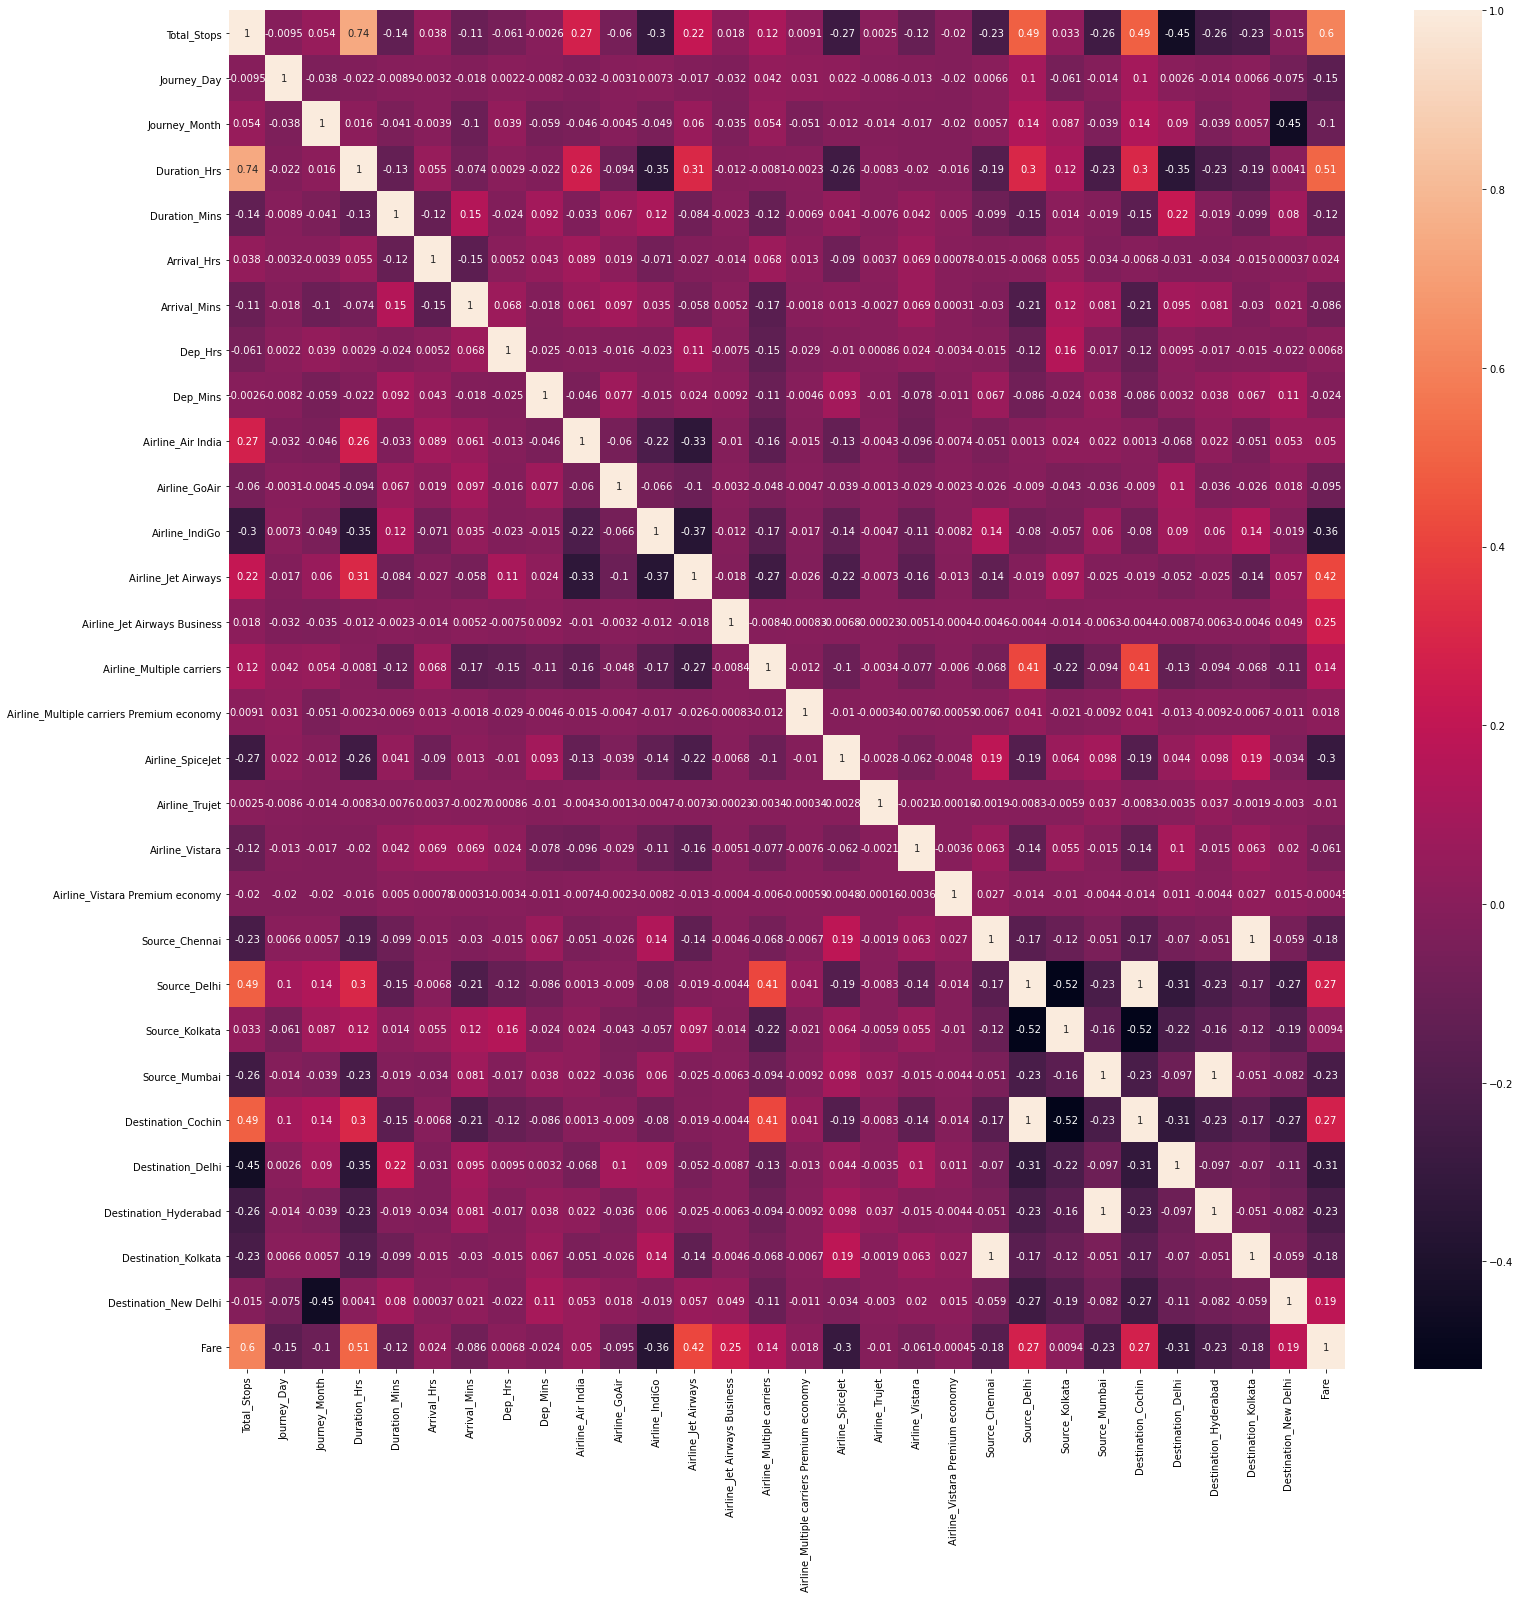

In [26]:
plt.figure(figsize = (25,25))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [27]:
##We can see that 'TotaL_Stops' and 'Duration_Hrs' are highly correlated
##Hence we can drop Duration_Hrs and Duration_Mins to reduce dimensionality
data.drop(labels=['Duration_Hrs','Duration_Mins'], axis=1, inplace=True)
data.head()

,Total_Stops,Journey_Day,Journey_Month,Arrival_Hrs,Arrival_Mins,Dep_Hrs,Dep_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Fare
0,0.0,24,3,1.0,10.0,22.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897
1,2.0,1,5,13.0,15.0,5.0,50.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662
2,2.0,9,6,4.0,25.0,9.0,25.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882
3,1.0,12,5,23.0,30.0,18.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218
4,1.0,1,3,21.0,35.0,16.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302


In [28]:
data.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_Month', 'Arrival_Hrs',
       'Arrival_Mins', 'Dep_Hrs', 'Dep_Mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Fare'],
      dtype='object')

In [29]:
x= data.loc[:,['Total_Stops', 'Journey_Day', 'Journey_Month', 'Arrival_Hrs',
       'Arrival_Mins', 'Dep_Hrs', 'Dep_Mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Journey_Day,Journey_Month,Arrival_Hrs,Arrival_Mins,Dep_Hrs,Dep_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24,3,1.0,10.0,22.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,1,5,13.0,15.0,5.0,50.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,9,6,4.0,25.0,9.0,25.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,12,5,23.0,30.0,18.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,1,3,21.0,35.0,16.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
y=data.iloc[:,-1].values
print(y)

[ 3897  7662 13882 ...  7229 12648 11753]


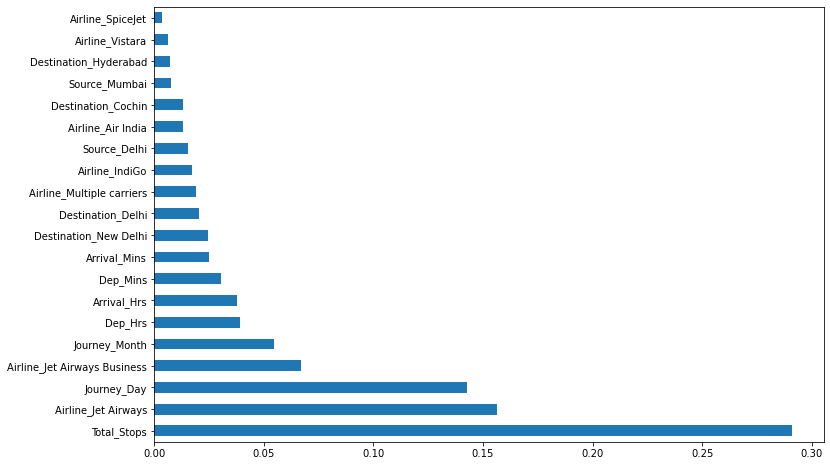

In [31]:
# View Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [32]:
#Split data into train and test
x=np.array(x)
print(x)

[[ 0. 24.  3. ...  0.  0.  1.]
 [ 2.  1.  5. ...  0.  0.  0.]
 [ 2.  9.  6. ...  0.  0.  0.]
 ...
 [ 0. 27.  4. ...  0.  0.  0.]
 [ 0.  1.  3. ...  0.  0.  1.]
 [ 2.  9.  5. ...  0.  0.  0.]]


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [34]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[ 1. 27.  5. ...  0.  0.  0.]
 [ 1.  9.  5. ...  0.  0.  0.]
 [ 1. 24.  4. ...  0.  0.  0.]
 ...
 [ 1. 15.  5. ...  0.  0.  0.]
 [ 0.  3.  3. ...  0.  0.  1.]
 [ 1.  1.  6. ...  0.  0.  0.]]
[ 9149 12373  5583 ...  7670  6144 10262]
[[ 2. 21.  5. ...  0.  0.  0.]
 [ 1.  3.  6. ...  0.  0.  0.]
 [ 1.  9.  5. ...  0.  0.  0.]
 ...
 [ 1. 21.  4. ...  0.  0.  0.]
 [ 1. 24.  3. ...  0.  0.  0.]
 [ 1.  6.  6. ...  0.  0.  0.]]
[16655  4959  9187 ...  7452  8824 14151]


# Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 0:7] = sc.fit_transform(x_train[:, 0:7])
x_test[:, 0:7] = sc.transform(x_test[:, 0:7])

In [36]:
print(x_train)
print(x_test)

[[ 0.25829846  1.57978425  0.25506567 ...  0.          0.
   0.        ]
 [ 0.25829846 -0.54301849  0.25506567 ...  0.          0.
   0.        ]
 [ 0.25829846  1.22598379 -0.60403412 ...  0.          0.
   0.        ]
 ...
 [ 0.25829846  0.16458242  0.25506567 ...  0.          0.
   0.        ]
 [-1.22301721 -1.2506194  -1.46313392 ...  0.          0.
   1.        ]
 [ 0.25829846 -1.48648637  1.11416547 ...  0.          0.
   0.        ]]
[[ 1.73961414  0.87218334  0.25506567 ...  0.          0.
   0.        ]
 [ 0.25829846 -1.2506194   1.11416547 ...  0.          0.
   0.        ]
 [ 0.25829846 -0.54301849  0.25506567 ...  0.          0.
   0.        ]
 ...
 [ 0.25829846  0.87218334 -0.60403412 ...  0.          0.
   0.        ]
 [ 0.25829846  1.22598379 -1.46313392 ...  0.          0.
   0.        ]
 [ 0.25829846 -0.89681895  1.11416547 ...  0.          0.
   0.        ]]


# Training Model Using RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [38]:
y_pred = regressor.predict(x_test)
print(y_pred)

[15821.3         5132.26666667  9040.         ...  6529.8
 12929.5        11925.28333333]


In [39]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.8333603914662885

# Tuning HyperParameter


In [40]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'random_state':[0, 10, 42,64]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=10, random_state=42),
             n_jobs=-1,
             param_grid=[{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100],
                          'random_state': [0, 10, 42, 64]}],
             scoring='neg_mean_squared_error')

In [41]:
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'n_estimators': 100, 'random_state': 64}


In [42]:
##Retrain based on best parameters
regressor_1 = RandomForestRegressor(n_estimators = 100, random_state = 64)
regressor_1.fit(x_train, y_train)

RandomForestRegressor(random_state=64)

In [43]:
##Predict Test result 
y_pred = regressor_1.predict(x_test)
print(y_pred)

[16829.02        5697.68666667  8956.2        ...  6782.92
 12717.419      13116.4975    ]


In [45]:
##Check Accuracy
metrics.r2_score(y_test, y_pred)

0.842353614263853

# Save Model

In [46]:
import pickle
file = open('flightFare_Model.pkl', 'wb')
pickle.dump(regressor_1, file)

# Load Model and Predict

In [47]:
model = open('flightFare_Model.pkl','rb')
regressor_2 = pickle.load(model)

In [48]:
y_prediction = regressor_2.predict(x_test)
metrics.r2_score(y_test, y_prediction)

0.842353614263853